# Automatic Differentiation
<b>
    
```
Deep learning frameworks expedite this work by automatically calculating derivatives, i.e., automatic differentiation. In practice, based on our designed model the system builds a computational graph, tracking which data combined through which operations to produce the output. Automatic differentiation enables the system to subsequently backpropagate gradients. Here, backpropagate simply means to trace through the computational graph, filling in the partial derivatives with respect to each parameter.

```
</b>

## Example

As a toy example, say that we are interested in differentiating the function `y=2x⊤x` with respect to the column vector x. To start, let us create the variable x and assign it an initial value.

In [1]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

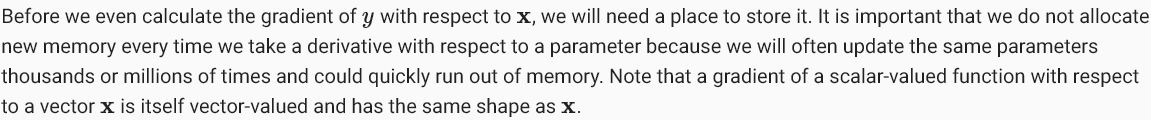

In [3]:
x.requires_grad_(True)
x.grad # Default is None

print(x.grad)

None


In [4]:
# Calculate y 
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

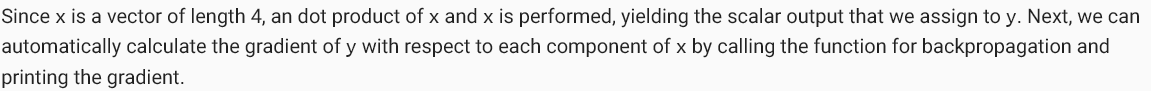

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

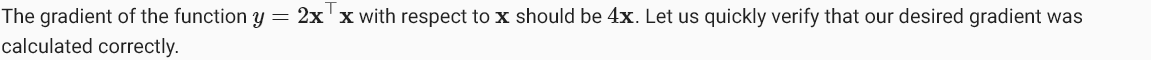

In [6]:
x.grad == 4 * x

tensor([True, True, True, True])

In [7]:
# Any other Func
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## 1. Backward for Non-Scaler Variables
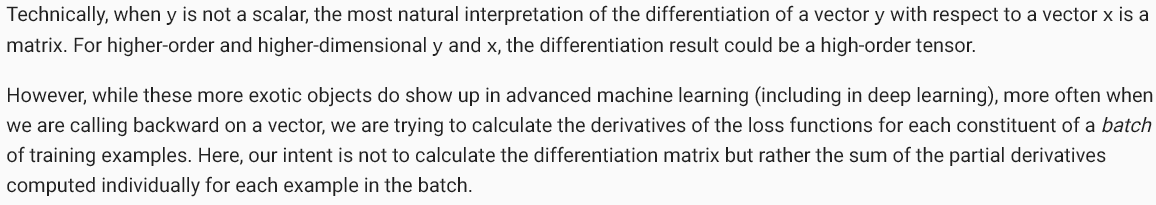

In [8]:
# Invoking `backward` on a non-scalar requires passing in a `grad` argument
# which specifies the gradient of the differentiated function w.r.t `self`.
# In our case, we simply want to sum the partial derivatives, so passing
# in a gradient of ones is appropriate
x.grad.zero_()
y = x * x

# y.backward(torch.ones(len(x))) equivalent to the below
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## 2. Detaching Computation
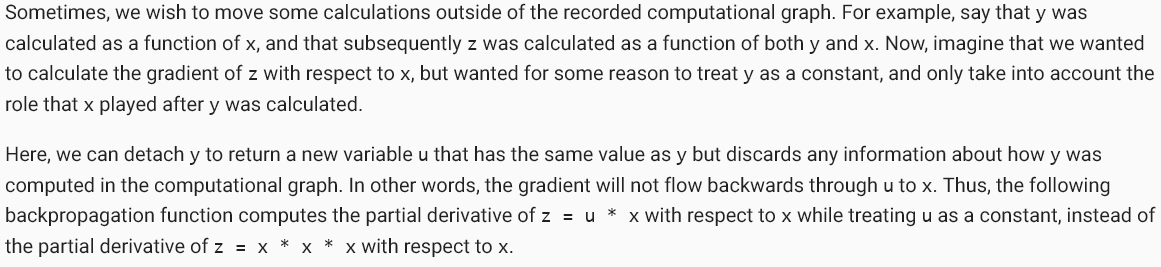

In [9]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

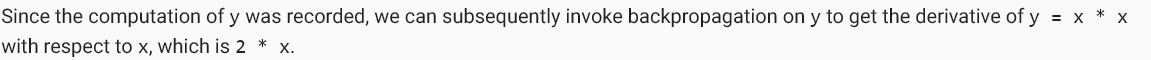

In [10]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## 3. Computing the Gradient of Python Control Flow
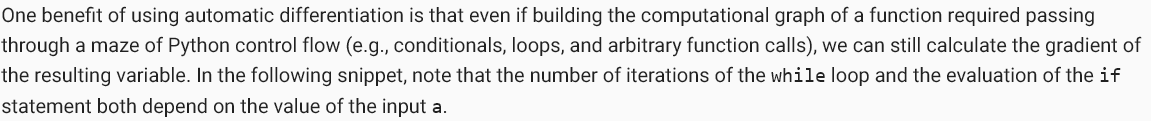

In [11]:
def f(x):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [15]:
# Compute the gradient
a = torch.randn(size=(), requires_grad=True)
d = f(a)

d.backward()

d

tensor(1579.7686, grad_fn=<MulBackward0>)